In [1]:
#import needed packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

Due to the large sizes of the datasets, we read 500,000 rows for 'train'.

In [2]:
train = pd.read_csv('train.csv', nrows = 500000)

From head() and info() functions, we can see the train dataset mainly contains user_id and the taret variable 'is_churn'. According to the explanation, churn is defined as whether the user did not continue the subscription within 30 days of expiration. is_churn = 1 means churn, is_churn = 0 means renewal.

In [3]:
train.head()

,msno,is_churn
0,waLDQMmcOu2jLDaV1ddDkgCrB/jl6sD66Xzs0Vqax1Y=,1
1,QA7uiXy8vIbUSPOkCf9RwQ3FsT8jVq2OxDr8zqa7bRQ=,1
2,fGwBva6hikQmTJzrbz/2Ezjm5Cth5jZUNvXigKK2AFA=,1
3,mT5V8rEpa+8wuqi6x0DoVd3H5icMKkE9Prt49UlmK+4=,1
4,XaPhtGLk/5UvvOYHcONTwsnH97P4eGECeq+BARGItRw=,1


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500000 entries, 0 to 499999
Data columns (total 2 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   msno      500000 non-null  object
 1   is_churn  500000 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 7.6+ MB


Next, is the 'member' dataset with 6,769,472 rows. This dataset includes user_id, the city they are from, age, gender, registration method, and registration data. As we can see from the first 4 rows, there are missing values in the gender column.

In [5]:
member = pd.read_csv('members_v3.csv')

In [6]:
member.head()

,msno,city,bd,gender,registered_via,registration_init_time
0,Rb9UwLQTrxzBVwCB6+bCcSQWZ9JiNLC9dXtM1oEsZA8=,1,0,NaN,11,20110911
1,+tJonkh+O1CA796Fm5X60UMOtB6POHAwPjbTRVl/EuU=,1,0,NaN,7,20110914
2,cV358ssn7a0f7jZOwGNWS07wCKVqxyiImJUX6xcIwKw=,1,0,NaN,11,20110915
3,9bzDeJP6sQodK73K5CBlJ6fgIQzPeLnRl0p5B77XP+g=,1,0,NaN,11,20110915
4,WFLY3s7z4EZsieHCt63XrsdtfTEmJ+2PnnKLH5GY4Tk=,6,32,female,9,20110915


In [7]:
member.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6769473 entries, 0 to 6769472
Data columns (total 6 columns):
 #   Column                  Dtype 
---  ------                  ----- 
 0   msno                    object
 1   city                    int64 
 2   bd                      int64 
 3   gender                  object
 4   registered_via          int64 
 5   registration_init_time  int64 
dtypes: int64(4), object(2)
memory usage: 309.9+ MB


In [8]:
member.describe()

,city,bd,registered_via,registration_init_time
count,6.769473e+06,6.769473e+06,6.769473e+06,6.769473e+06
mean,3.847358e+00,9.795794e+00,5.253069e+00,2.014518e+07
std,5.478359e+00,1.792590e+01,2.361398e+00,2.318601e+04
min,1.000000e+00,-7.168000e+03,-1.000000e+00,2.004033e+07
25%,1.000000e+00,0.000000e+00,4.000000e+00,2.014042e+07
50%,1.000000e+00,0.000000e+00,4.000000e+00,2.015101e+07
75%,4.000000e+00,2.100000e+01,7.000000e+00,2.016060e+07
max,2.200000e+01,2.016000e+03,1.900000e+01,2.017043e+07


The datatype of registration_init_time is currently integer. I would like to transform it to '%Y-%m' format for further analysis.

In [9]:
from datetime import datetime
member['registration_init_time'] = pd.to_datetime(member['registration_init_time'], format = '%Y%m%d')
member['registration_init_time'] = member['registration_init_time'].dt.date.apply(lambda x: x.strftime('%Y-%m'))

In [10]:
member.head()

,msno,city,bd,gender,registered_via,registration_init_time
0,Rb9UwLQTrxzBVwCB6+bCcSQWZ9JiNLC9dXtM1oEsZA8=,1,0,NaN,11,2011-09
1,+tJonkh+O1CA796Fm5X60UMOtB6POHAwPjbTRVl/EuU=,1,0,NaN,7,2011-09
2,cV358ssn7a0f7jZOwGNWS07wCKVqxyiImJUX6xcIwKw=,1,0,NaN,11,2011-09
3,9bzDeJP6sQodK73K5CBlJ6fgIQzPeLnRl0p5B77XP+g=,1,0,NaN,11,2011-09
4,WFLY3s7z4EZsieHCt63XrsdtfTEmJ+2PnnKLH5GY4Tk=,6,32,female,9,2011-09


Let's read the 'transactions' dataset. There are 21,547,745 observations. This dataset is about the users' payment methods, lengths of membership plan in days, plan listed price, actual amount paid, plan auto renewed or not, transaction date, membership expire date, and whether or not the user canceled the membership in this transaction.

In [11]:
transactions = pd.read_csv('transactions.csv')

In [12]:
transactions.head()

,msno,payment_method_id,payment_plan_days,plan_list_price,actual_amount_paid,is_auto_renew,transaction_date,membership_expire_date,is_cancel
0,YyO+tlZtAXYXoZhNr3Vg3+dfVQvrBVGO8j1mfqe4ZHc=,41,30,129,129,1,20150930,20151101,0
1,AZtu6Wl0gPojrEQYB8Q3vBSmE2wnZ3hi1FbK1rQQ0A4=,41,30,149,149,1,20150930,20151031,0
2,UkDFI97Qb6+s2LWcijVVv4rMAsORbVDT2wNXF0aVbns=,41,30,129,129,1,20150930,20160427,0
3,M1C56ijxozNaGD0t2h68PnH2xtx5iO5iR2MVYQB6nBI=,39,30,149,149,1,20150930,20151128,0
4,yvj6zyBUaqdbUQSrKsrZ+xNDVM62knauSZJzakS9OW4=,39,30,149,149,1,20150930,20151121,0


In [13]:
transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21547746 entries, 0 to 21547745
Data columns (total 9 columns):
 #   Column                  Dtype 
---  ------                  ----- 
 0   msno                    object
 1   payment_method_id       int64 
 2   payment_plan_days       int64 
 3   plan_list_price         int64 
 4   actual_amount_paid      int64 
 5   is_auto_renew           int64 
 6   transaction_date        int64 
 7   membership_expire_date  int64 
 8   is_cancel               int64 
dtypes: int64(8), object(1)
memory usage: 1.4+ GB


The datatypes of  transaction_date and membership_expire_date are also integers. I would like to transform them to '%Y%m%d' format for further analysis.

In [14]:
transactions['transaction_date'] = pd.to_datetime(transactions['transaction_date'], \
                                                  format = '%Y%m%d')
transactions['membership_expire_date'] = pd.to_datetime(transactions['membership_expire_date'], \
                                                  format = '%Y%m%d')

There might be some price gaps between 'plan_list_price' and 'actual_amount_paid', so I would like to create a column 'discount', which is 'plan_list_price' minus 'actual_amount_paid'.

In [15]:
transactions['discount'] = np.where( 
(transactions['plan_list_price'] < transactions['actual_amount_paid']), 0, np.where(
(transactions['plan_list_price'] > transactions['actual_amount_paid']), 
 transactions['plan_list_price'] - transactions['actual_amount_paid'], 0))

In [16]:
transactions.head()

,msno,payment_method_id,payment_plan_days,plan_list_price,actual_amount_paid,is_auto_renew,transaction_date,membership_expire_date,is_cancel,discount
0,YyO+tlZtAXYXoZhNr3Vg3+dfVQvrBVGO8j1mfqe4ZHc=,41,30,129,129,1,2015-09-30,2015-11-01,0,0
1,AZtu6Wl0gPojrEQYB8Q3vBSmE2wnZ3hi1FbK1rQQ0A4=,41,30,149,149,1,2015-09-30,2015-10-31,0,0
2,UkDFI97Qb6+s2LWcijVVv4rMAsORbVDT2wNXF0aVbns=,41,30,129,129,1,2015-09-30,2016-04-27,0,0
3,M1C56ijxozNaGD0t2h68PnH2xtx5iO5iR2MVYQB6nBI=,39,30,149,149,1,2015-09-30,2015-11-28,0,0
4,yvj6zyBUaqdbUQSrKsrZ+xNDVM62knauSZJzakS9OW4=,39,30,149,149,1,2015-09-30,2015-11-21,0,0


Last, is the 'user_logs' dataset. As the dataset is really large, I also read 1,000,000 rows. This dataset contains information about daily user logs describing listening behaviors of a user, including user_id, date, number of songs played of different percents of song length, and total seconds played.

In [17]:
user_logs = pd.read_csv('user_logs.csv', nrows = 1000000)

In [18]:
user_logs.head()

,msno,date,num_25,num_50,num_75,num_985,num_100,num_unq,total_secs
0,rxIP2f2aN0rYNp+toI0Obt/N/FYQX8hcO1fTmmy2h34=,20150513,0,0,0,0,1,1,280.335
1,rxIP2f2aN0rYNp+toI0Obt/N/FYQX8hcO1fTmmy2h34=,20150709,9,1,0,0,7,11,1658.948
2,yxiEWwE9VR5utpUecLxVdQ5B7NysUPfrNtGINaM2zA8=,20150105,3,3,0,0,68,36,17364.956
3,yxiEWwE9VR5utpUecLxVdQ5B7NysUPfrNtGINaM2zA8=,20150306,1,0,1,1,97,27,24667.317
4,yxiEWwE9VR5utpUecLxVdQ5B7NysUPfrNtGINaM2zA8=,20150501,3,0,0,0,38,38,9649.029


In [19]:
user_logs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 9 columns):
 #   Column      Non-Null Count    Dtype  
---  ------      --------------    -----  
 0   msno        1000000 non-null  object 
 1   date        1000000 non-null  int64  
 2   num_25      1000000 non-null  int64  
 3   num_50      1000000 non-null  int64  
 4   num_75      1000000 non-null  int64  
 5   num_985     1000000 non-null  int64  
 6   num_100     1000000 non-null  int64  
 7   num_unq     1000000 non-null  int64  
 8   total_secs  1000000 non-null  float64
dtypes: float64(1), int64(7), object(1)
memory usage: 68.7+ MB


Transform 'date' to '%Y%m%d' format.

In [20]:
user_logs['date'] = pd.to_datetime(user_logs['date'], format = '%Y%m%d')

In [21]:
user_logs.head()

,msno,date,num_25,num_50,num_75,num_985,num_100,num_unq,total_secs
0,rxIP2f2aN0rYNp+toI0Obt/N/FYQX8hcO1fTmmy2h34=,2015-05-13,0,0,0,0,1,1,280.335
1,rxIP2f2aN0rYNp+toI0Obt/N/FYQX8hcO1fTmmy2h34=,2015-07-09,9,1,0,0,7,11,1658.948
2,yxiEWwE9VR5utpUecLxVdQ5B7NysUPfrNtGINaM2zA8=,2015-01-05,3,3,0,0,68,36,17364.956
3,yxiEWwE9VR5utpUecLxVdQ5B7NysUPfrNtGINaM2zA8=,2015-03-06,1,0,1,1,97,27,24667.317
4,yxiEWwE9VR5utpUecLxVdQ5B7NysUPfrNtGINaM2zA8=,2015-05-01,3,0,0,0,38,38,9649.029


**Exploratory Data Analysis (EDA) and Correlation**

At the beginning of EDA, I would like to have some understandings on the missing values distribution first.

There are no missing values in the 100,000 rows we chose from 'train' dataset.

<AxesSubplot:>

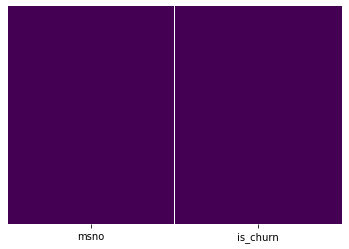

In [22]:
sns.heatmap(train.isnull(), yticklabels = False, cbar = False, cmap = 'viridis')

There are about 65% missings values in 'gender' column of the 'member' dataset. Therefore, I would drop it for the majority missing values.

<AxesSubplot:>

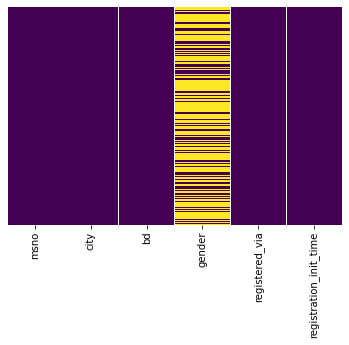

In [23]:
sns.heatmap(member.isnull(), yticklabels = False, cbar = False, cmap = 'viridis')

In [24]:
member = member.drop(columns = ['gender'])

There are no missing values in 'transactions' dataset and the 100,000 rows we chose from 'user_logs' dataset.

<AxesSubplot:>

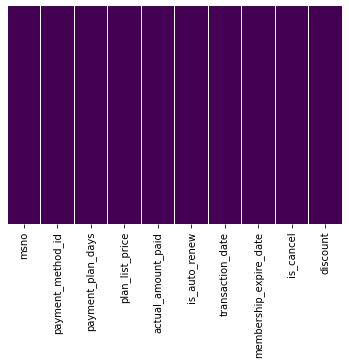

In [25]:
sns.heatmap(transactions.isnull(), yticklabels = False, cbar = False, cmap = 'viridis')

<AxesSubplot:>

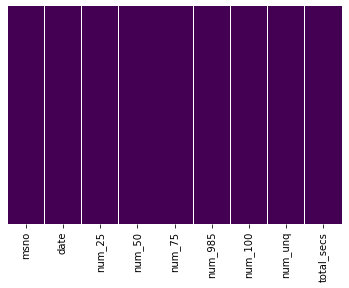

In [26]:
sns.heatmap(user_logs.isnull(), yticklabels = False, cbar = False, cmap = 'viridis')

Let's go over the distributions of some features:

The 'is_churn' = 0 is about 8 times of 'is_churn' = 1 in the 'train' dataset, so most people would not churn after his/her subscription expires.

<AxesSubplot:xlabel='is_churn', ylabel='count'>

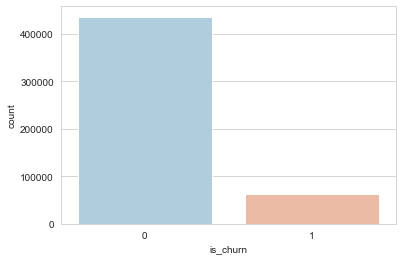

In [27]:
sns.set_style('whitegrid')
sns.countplot(x = 'is_churn', data = train, palette = 'RdBu_r')

In [28]:
train['is_churn'].value_counts()

0    436529
1     63471
Name: is_churn, dtype: int64

In [29]:
#Merge the 'train' and 'member' datasets
train_member = pd.merge(train, member, on = 'msno', how = 'left')

In [30]:
train_member.head()

,msno,is_churn,city,bd,registered_via,registration_init_time
0,waLDQMmcOu2jLDaV1ddDkgCrB/jl6sD66Xzs0Vqax1Y=,1,18.0,36.0,9.0,2005-04
1,QA7uiXy8vIbUSPOkCf9RwQ3FsT8jVq2OxDr8zqa7bRQ=,1,10.0,38.0,9.0,2005-04
2,fGwBva6hikQmTJzrbz/2Ezjm5Cth5jZUNvXigKK2AFA=,1,11.0,27.0,9.0,2005-10
3,mT5V8rEpa+8wuqi6x0DoVd3H5icMKkE9Prt49UlmK+4=,1,13.0,23.0,9.0,2005-11
4,XaPhtGLk/5UvvOYHcONTwsnH97P4eGECeq+BARGItRw=,1,3.0,27.0,9.0,2005-12


In [31]:
train_member.describe()

,is_churn,city,bd,registered_via
count,500000.000000,442438.000000,442438.000000,442438.000000
mean,0.126942,5.980639,13.685669,6.874016
std,0.332908,6.453978,20.880510,1.958048
min,0.000000,1.000000,-3152.000000,3.000000
25%,0.000000,1.000000,0.000000,7.000000
50%,0.000000,1.000000,0.000000,7.000000
75%,0.000000,13.000000,27.000000,9.000000
max,1.000000,22.000000,1970.000000,13.000000


I plotted members' age with 'is_churn' as the column. No matter is_churn = 0 or is_churn = 1, the majority members are between 20-30 years old, which indicates people using KKBOX are mainly young adults.

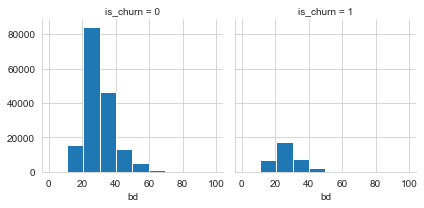

In [32]:
#filter out the outliers in 'bd' column
#(age cannot be less than 0 or more than 100 in most cases)
a = sns.FacetGrid(data = train_member[(train_member['bd'] > 0) & (train_member['bd'] < 100)], 
                  col = 'is_churn')
a = a.map(plt.hist, 'bd')

For registration method, most people use methods '7' and '9'. People who churn after his/her subscription expires mostly registered via method '9', while majority of people who do not churn mostly registered via method '7'.

<AxesSubplot:xlabel='is_churn', ylabel='registered_via'>

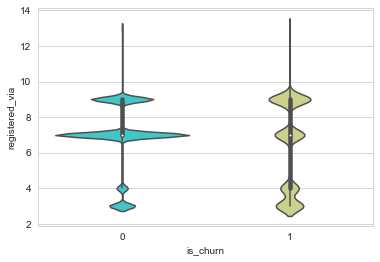

In [33]:
sns.violinplot(x = 'is_churn', y = 'registered_via', data = train_member, palette = 'rainbow')

In [34]:
#Merge the 'train' and 'transactions' datasets
train_trans = pd.merge(train, transactions, on = 'msno', how = 'left')

In [35]:
train_trans.head()

,msno,is_churn,payment_method_id,payment_plan_days,plan_list_price,actual_amount_paid,is_auto_renew,transaction_date,membership_expire_date,is_cancel,discount
0,waLDQMmcOu2jLDaV1ddDkgCrB/jl6sD66Xzs0Vqax1Y=,1,38,7,0,0,0,2016-10-31,2016-11-07,0,0
1,waLDQMmcOu2jLDaV1ddDkgCrB/jl6sD66Xzs0Vqax1Y=,1,38,30,149,149,0,2017-01-07,2017-02-06,0,0
2,QA7uiXy8vIbUSPOkCf9RwQ3FsT8jVq2OxDr8zqa7bRQ=,1,39,30,149,149,1,2016-10-31,2016-12-21,0,0
3,QA7uiXy8vIbUSPOkCf9RwQ3FsT8jVq2OxDr8zqa7bRQ=,1,39,30,149,149,1,2016-07-15,2016-08-21,0,0
4,QA7uiXy8vIbUSPOkCf9RwQ3FsT8jVq2OxDr8zqa7bRQ=,1,39,30,149,149,1,2016-08-31,2016-10-21,0,0


In [36]:
train_trans.describe()

,is_churn,payment_method_id,payment_plan_days,plan_list_price,actual_amount_paid,is_auto_renew,is_cancel,discount
count,7.826959e+06,7.826959e+06,7.826959e+06,7.826959e+06,7.826959e+06,7.826959e+06,7.826959e+06,7.826959e+06
mean,8.759098e-02,3.918082e+01,2.992006e+01,1.326702e+02,1.371477e+02,9.133716e-01,1.910525e-02,1.066628e+00
std,2.826992e-01,3.335726e+00,1.779871e+01,7.942717e+01,7.631548e+01,2.812898e-01,1.368950e-01,1.031836e+01
min,0.000000e+00,2.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.000000e+00,3.900000e+01,3.000000e+01,9.900000e+01,9.900000e+01,1.000000e+00,0.000000e+00,0.000000e+00
50%,0.000000e+00,4.100000e+01,3.000000e+01,1.490000e+02,1.490000e+02,1.000000e+00,0.000000e+00,0.000000e+00
75%,0.000000e+00,4.100000e+01,3.000000e+01,1.490000e+02,1.490000e+02,1.000000e+00,0.000000e+00,0.000000e+00
max,1.000000e+00,4.100000e+01,4.500000e+02,2.000000e+03,2.000000e+03,1.000000e+00,1.000000e+00,1.800000e+02


From the describe() table above, we can tell that most payment plan durations are less than or equal to 30 days. Therefore, I would like to filter payment plan durations before plotting with 'is_churn'.

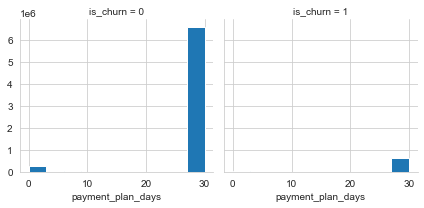

In [37]:
c = sns.FacetGrid(data = train_trans[(train_trans['payment_plan_days'] <= 30)], col = 'is_churn')
c = c.map(plt.hist, 'payment_plan_days')

From below plot, it is obvious that the vast majority of users have automatic renewal in their subscriptions.

<AxesSubplot:xlabel='is_churn', ylabel='count'>

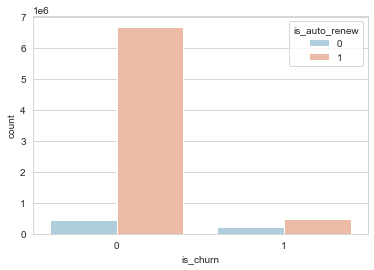

In [38]:
sns.set_style('whitegrid')
sns.countplot(x = 'is_churn', hue = 'is_auto_renew', data = train_trans, palette = 'RdBu_r')

As there are not much discounts in this dataset to discover, we cannot tell if there is significant correlation between is_churn and discount.

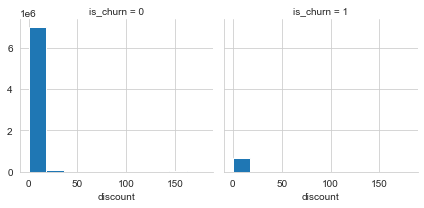

In [39]:
b = sns.FacetGrid(data = train_trans, col = 'is_churn')
b = b.map(plt.hist, 'discount')

Next, I groupby() the 'user_logs' dataset with user_id in order to observe the number of times logged in per user.

In [40]:
user_count = user_logs.groupby('msno').size().reset_index(name = 'number of times logged in')

In [41]:
user_count

,msno,number of times logged in
0,+++FOrTS7ab3tIgIh8eWwX4FqRv8w/FoiOuyXsFvphY=,1
1,+++dz9ZCWE2HB/47pJU82NJXQzQuZDx1Wm50YSk/kKk=,1
2,++5IYGT7+CWMJ8hRsqoQLoaTXBLMJzlfK12eMTr9Ilw=,1
3,++7jYuHyUSp41PyuttFx/MCepv7TdFQULgN8TxZULZk=,3
4,++95tJZADNg8U8HKbYdxbbXIRsO6pw1zBK4tHI7BtZo=,12
...,...,...
202505,zztGcSZznx0uMBvc0fTQVTfCzeS7Ho/otO2L/4FXs/w=,5
202506,zzxZeMFx2fjfKZigMnJa2w0EmloDbm8+8nTf/o/00GY=,10
202507,zzz1Dc3P9s53HAowRTrm3fNsWju5yeN4YBfNDq7Z99Q=,4
202508,zzz4xr5LLzoxUqD6LfKiieCt8Or4dUWFQ0RA5gmkx8I=,4


Merge 'train' dataset and 'user_count'.

In [42]:
user_count_merge = pd.merge(train, user_count, on = 'msno', how = 'inner')

In [43]:
user_count_merge

,msno,is_churn,number of times logged in
0,T0FF6lumjKcqEO0O+tUH2ytc+Kb9EkeaLzcVUiTr1aE=,1,14
1,I8dFN2EjFN1mt4Xel8WQX1/g7u6Dg4PBMHLkiDjhUS8=,1,14
2,BJfEs9V27SKREEiSEB94PdWU0c9kz5xpe2mEv09nTO0=,1,12
3,Q3zQXIS9cOKLdgyF1IIQkm4xEiF9cgIuK3dxTdXN6As=,1,5
4,ddBEjhJQYsrouP54GTueBgvsQPrd7frM1YDSp6zi8T0=,1,3
...,...,...,...
49535,kv3WwlGABbU4irOmxhJvdMeRD5LGfg+PT+wLjAPttKw=,0,9
49536,bJANYw/jIKVjF4zLSyd2+4Yz2ytRaQDSucT/czvuIKY=,0,15
49537,8ArohLd9h6ZhIuCE/kloCDIwKAt76oWG8Tkxqyuil4g=,0,16
49538,McxcGgefQdCSSd/uLSc4nQrFPDAMbZ68jKhvpID9lk8=,0,16


The plot below clearly shows that the average churn rate decreases while the number of times users logged in increases. The more the users log in, the less likely they would churn.

<AxesSubplot:xlabel='number of times logged in'>

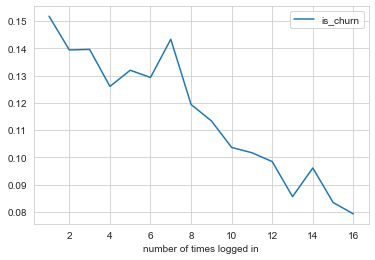

In [44]:
user_count_merge.groupby('number of times logged in').mean().plot()

Next, groupby() the 'user_logs' dataset with user_id and calculate the median of total seconds played.

In [45]:
user_median_time = \
user_logs.groupby('msno').median()["total_secs"].reset_index(name = 'median total secs played')

In [46]:
user_median_time

,msno,median total secs played
0,+++FOrTS7ab3tIgIh8eWwX4FqRv8w/FoiOuyXsFvphY=,2998.2670
1,+++dz9ZCWE2HB/47pJU82NJXQzQuZDx1Wm50YSk/kKk=,17132.9040
2,++5IYGT7+CWMJ8hRsqoQLoaTXBLMJzlfK12eMTr9Ilw=,448.5740
3,++7jYuHyUSp41PyuttFx/MCepv7TdFQULgN8TxZULZk=,1693.1130
4,++95tJZADNg8U8HKbYdxbbXIRsO6pw1zBK4tHI7BtZo=,2779.8700
...,...,...
202505,zztGcSZznx0uMBvc0fTQVTfCzeS7Ho/otO2L/4FXs/w=,2937.0480
202506,zzxZeMFx2fjfKZigMnJa2w0EmloDbm8+8nTf/o/00GY=,15235.7420
202507,zzz1Dc3P9s53HAowRTrm3fNsWju5yeN4YBfNDq7Z99Q=,1516.7555
202508,zzz4xr5LLzoxUqD6LfKiieCt8Or4dUWFQ0RA5gmkx8I=,2326.9965


Merge 'train' dataset and 'user_median_time'.

In [47]:
user_medtime_merge = pd.merge(train, user_median_time, on = 'msno', how = 'inner')

In [48]:
user_medtime_merge

,msno,is_churn,median total secs played
0,T0FF6lumjKcqEO0O+tUH2ytc+Kb9EkeaLzcVUiTr1aE=,1,13761.4235
1,I8dFN2EjFN1mt4Xel8WQX1/g7u6Dg4PBMHLkiDjhUS8=,1,9477.5610
2,BJfEs9V27SKREEiSEB94PdWU0c9kz5xpe2mEv09nTO0=,1,6523.1095
3,Q3zQXIS9cOKLdgyF1IIQkm4xEiF9cgIuK3dxTdXN6As=,1,1837.1390
4,ddBEjhJQYsrouP54GTueBgvsQPrd7frM1YDSp6zi8T0=,1,1810.4830
...,...,...,...
49535,kv3WwlGABbU4irOmxhJvdMeRD5LGfg+PT+wLjAPttKw=,0,6426.7750
49536,bJANYw/jIKVjF4zLSyd2+4Yz2ytRaQDSucT/czvuIKY=,0,5848.1420
49537,8ArohLd9h6ZhIuCE/kloCDIwKAt76oWG8Tkxqyuil4g=,0,9312.9240
49538,McxcGgefQdCSSd/uLSc4nQrFPDAMbZ68jKhvpID9lk8=,0,38939.0160


From this plot, we can see that people who do not churn after his/her subscription expires tend to have played longer contents in total on KKBOX. Therefore, if KKBOX does not want users to churn , they have to make users stay on KKBOX more often.

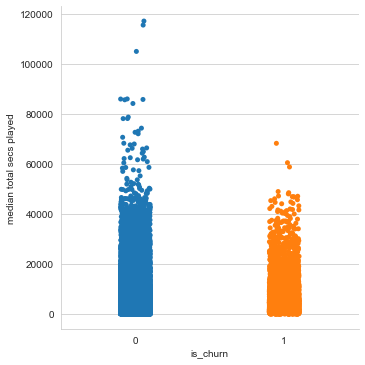

In [49]:
sns.catplot(x = "is_churn", y = "median total secs played", data = user_medtime_merge)